In [ ]:
#Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
import plotly.graph_objects as go

In [ ]:
#Loading Datasets

In [2]:
df= pd.read_csv("Funding Amount Statistics.csv")

In [ ]:
#Data cleaning and Preprocessing and Data Understanding

In [3]:
df.head()

,Sector,Funding_Year,Funding_Month,Funding_Amount( Millions)
0,enterprise software,2023,Jan,1111
1,enterprise software,2023,Feb,983
2,enterprise software,2023,Mar,2480
3,enterprise software,2023,Apr,4632
4,enterprise software,2023,May,1904


In [4]:
df.shape

(1104, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sector                     1104 non-null   object
 1   Funding_Year               1104 non-null   int64 
 2   Funding_Month              1104 non-null   object
 3   Funding_Amount( Millions)  1104 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 34.6+ KB


In [6]:
df.describe(include='all')

,Sector,Funding_Year,Funding_Month,Funding_Amount( Millions)
count,1104,1104.000000,1104,1104.000000
unique,46,NaN,12,NaN
top,enterprise software,NaN,Jan,NaN
freq,24,NaN,92,NaN
mean,NaN,2023.500000,NaN,2527.820652
std,NaN,0.500227,NaN,1462.476744
min,NaN,2023.000000,NaN,111.000000
25%,NaN,2023.000000,NaN,1206.500000
50%,NaN,2023.500000,NaN,2536.500000
75%,NaN,2024.000000,NaN,3793.000000


In [ ]:
#Rename column

In [7]:
df=df.rename(columns={'Funding_Amount( Millions)':'Funding_Amount'})

In [8]:
print(df)

                   Sector  Funding_Year Funding_Month  Funding_Amount
0     enterprise software          2023           Jan            1111
1     enterprise software          2023           Feb             983
2     enterprise software          2023           Mar            2480
3     enterprise software          2023           Apr            4632
4     enterprise software          2023           May            1904
...                   ...           ...           ...             ...
1099                media          2024           Aug            2868
1100                media          2024           Sep            4424
1101                media          2024           Oct            3039
1102                media          2024           Nov            2374
1103                media          2024           Dec            3547

[1104 rows x 4 columns]


In [9]:
df['Sector'].unique()

array(['enterprise software', 'education', 'fashion tech', 'drone tech',
       'sports', 'robotics', 'marketing & ad tech', 'construction tech',
       'geographic information systems', 'nanotechnology', 'retail',
       'sustainability in financial services',
       'blockchain infrastructure', 'enterprise infrastructure',
       'generativeai', 'legal', 'iot', 'beauty tech',
       'sustainability tech', 'space tech', 'quantum computing',
       'ai infrastructure', 'telecom', 'energy', 'transportation',
       'cyber security', 'virtual reality', 'advanced materials',
       'healthcare', 'f&b', 'hospitality', 'mining', 'augmented reality',
       'chemicals and materials tech', 'metaverse', 'agriculture',
       'manufacturing', 'real estate tech', 'hr tech', 'finance',
       'chemicals & materials tech', 'consumer', 'govtech', 'hrtech',
       'marketing & ad tech ', 'media'], dtype=object)

In [10]:
df['Sector'].nunique()

46

In [15]:
df['Sector']=df['Sector'].replace({'hr tech':'hrtech'})
df['Sector']=df['Sector'].replace({'marketing & ad tech ':'marketing & ad tech'})
df['Sector']=df['Sector'].replace({'chemicals and materials tech':'chemicals & materials tech'})
print(df['Sector'].unique())
print(df['Sector'].nunique())

['enterprise software' 'education' 'fashion tech' 'drone tech' 'sports'
 'robotics' 'marketing & ad tech' 'construction tech'
 'geographic information systems' 'nanotechnology' 'retail'
 'sustainability in financial services' 'blockchain infrastructure'
 'enterprise infrastructure' 'generativeai' 'legal' 'iot' 'beauty tech'
 'sustainability tech' 'space tech' 'quantum computing'
 'ai infrastructure' 'telecom' 'energy' 'transportation' 'cyber security'
 'virtual reality' 'advanced materials' 'healthcare' 'f&b' 'hospitality'
 'mining' 'augmented reality' 'chemicals & materials tech' 'metaverse'
 'agriculture' 'manufacturing' 'real estate tech' 'hrtech' 'finance'
 'consumer' 'govtech' 'media']
43


In [16]:
df[df['Sector']=='marketing & ad tech']

,Sector,Funding_Year,Funding_Month,Funding_Amount
144,marketing & ad tech,2023,Jan,4910
145,marketing & ad tech,2023,Feb,1816
146,marketing & ad tech,2023,Mar,352
147,marketing & ad tech,2023,Apr,2324
148,marketing & ad tech,2023,May,4600
149,marketing & ad tech,2023,Jun,1628
150,marketing & ad tech,2023,Jul,4805
151,marketing & ad tech,2023,Aug,4394
152,marketing & ad tech,2023,Sep,2034
153,marketing & ad tech,2023,Oct,3508


In [17]:
df[df['Sector']=='ai infrastructure']

,Sector,Funding_Year,Funding_Month,Funding_Amount
504,ai infrastructure,2023,Jan,3058
505,ai infrastructure,2023,Feb,4957
506,ai infrastructure,2023,Mar,1574
507,ai infrastructure,2023,Apr,1242
508,ai infrastructure,2023,May,1352
509,ai infrastructure,2023,Jun,1021
510,ai infrastructure,2023,Jul,2368
511,ai infrastructure,2023,Aug,285
512,ai infrastructure,2023,Sep,4096
513,ai infrastructure,2023,Oct,1238


In [18]:
filtered_mk = df[df['Sector'] == 'marketing & ad tech']
filtered_hr = df[df['Sector'] == 'hrtech']
filtered_cm = df[df['Sector'] == 'chemicals & materials tech']
# Group by year and month, and sum the amount
combined_mk = filtered_mk.groupby(['Funding_Year', 'Funding_Month'], as_index=False)['Funding_Amount'].sum()
combined_hr = filtered_hr.groupby(['Funding_Year', 'Funding_Month'], as_index=False)['Funding_Amount'].sum()
combined_cm = filtered_cm.groupby(['Funding_Year', 'Funding_Month'], as_index=False)['Funding_Amount'].sum()
# Display the combined DataFrame
print(combined_mk)

    Funding_Year Funding_Month  Funding_Amount
0           2023           Apr            3245
1           2023           Aug            9266
2           2023           Dec            3747
3           2023           Feb            4896
4           2023           Jan            5807
5           2023           Jul            5338
6           2023           Jun            6527
7           2023           Mar            1759
8           2023           May            8380
9           2023           Nov            7457
10          2023           Oct            7909
11          2023           Sep            6952
12          2024           Apr            4322
13          2024           Aug            7612
14          2024           Dec            3876
15          2024           Feb            6751
16          2024           Jan             929
17          2024           Jul            5227
18          2024           Jun            4761
19          2024           Mar            4854
20          2

In [19]:
print(combined_hr)

    Funding_Year Funding_Month  Funding_Amount
0           2023           Apr            3144
1           2023           Aug            2779
2           2023           Dec            3959
3           2023           Feb            6664
4           2023           Jan            2851
5           2023           Jul            2494
6           2023           Jun            4195
7           2023           Mar            8179
8           2023           May            6434
9           2023           Nov            4740
10          2023           Oct            8505
11          2023           Sep            2710
12          2024           Apr            3707
13          2024           Aug            5490
14          2024           Dec            1942
15          2024           Feb            8353
16          2024           Jan            3713
17          2024           Jul            5230
18          2024           Jun            8064
19          2024           Mar             941
20          2

In [20]:
print(combined_cm)

    Funding_Year Funding_Month  Funding_Amount
0           2023           Apr            5516
1           2023           Aug            1666
2           2023           Dec            2293
3           2023           Feb            4962
4           2023           Jan            7368
5           2023           Jul            2767
6           2023           Jun            5777
7           2023           Mar            1317
8           2023           May            5125
9           2023           Nov            4848
10          2023           Oct            4262
11          2023           Sep            4812
12          2024           Apr            2102
13          2024           Aug            7473
14          2024           Dec            5523
15          2024           Feb            1381
16          2024           Jan            6632
17          2024           Jul            7365
18          2024           Jun            1911
19          2024           Mar            3637
20          2

In [ ]:
#Now append those sectors with combined value 

In [21]:
#Since df will show 2 values of each sector in different rows (month and year), we have to add combined value instead
#Hence we have to remove those sectors and append later on. 
df = df[df['Sector'] != 'marketing & ad tech']
df = df[df['Sector'] != 'hrtech']
df = df[df['Sector'] != 'chemicals & materials tech']


In [ ]:
#Now append those sectors with combined value 

In [22]:
combined_mk["Sector"]="marketing & ad tech"
df = pd.concat([df, combined_mk], ignore_index=True)

combined_hr["Sector"]="hrtech"
df = pd.concat([df, combined_hr], ignore_index=True)

combined_cm["Sector"]="chemicals & materials tech"
df = pd.concat([df, combined_cm], ignore_index=True)

df

,Sector,Funding_Year,Funding_Month,Funding_Amount
0,enterprise software,2023,Jan,1111
1,enterprise software,2023,Feb,983
2,enterprise software,2023,Mar,2480
3,enterprise software,2023,Apr,4632
4,enterprise software,2023,May,1904
...,...,...,...,...
1027,chemicals & materials tech,2024,Mar,3637
1028,chemicals & materials tech,2024,May,1561
1029,chemicals & materials tech,2024,Nov,6734
1030,chemicals & materials tech,2024,Oct,7562


In [23]:
df['Month']=df['Funding_Month'].map({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12})
df

,Sector,Funding_Year,Funding_Month,Funding_Amount,Month
0,enterprise software,2023,Jan,1111,1
1,enterprise software,2023,Feb,983,2
2,enterprise software,2023,Mar,2480,3
3,enterprise software,2023,Apr,4632,4
4,enterprise software,2023,May,1904,5
...,...,...,...,...,...
1027,chemicals & materials tech,2024,Mar,3637,3
1028,chemicals & materials tech,2024,May,1561,5
1029,chemicals & materials tech,2024,Nov,6734,11
1030,chemicals & materials tech,2024,Oct,7562,10


In [26]:
df['Sector'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43], dtype=int64)

In [27]:
df['Sector'].nunique()

43

In [24]:
df["Sector"]=df["Sector"].map({'enterprise software':1, 'education':2, 'fashion tech':3, 'drone tech':4,
       'sports':5, 'robotics':6, 'construction tech':7,
       'geographic information systems':8, 'nanotechnology':9, 'retail':10,
       'sustainability in financial services':11,
       'blockchain infrastructure':12, 'enterprise infrastructure':13,
       'generativeai':14, 'legal':15, 'iot':16, 'beauty tech':17,
       'sustainability tech':18, 'space tech':19, 'quantum computing':20,
       'ai infrastructure':21, 'telecom':22, 'energy':23, 'transportation':24,
       'cyber security':25, 'virtual reality':26, 'advanced materials':27,
       'healthcare':28, 'f&b':29, 'hospitality':30, 'mining':31, 'augmented reality':32,
       'metaverse':33, 'agriculture':34,
       'manufacturing':35, 'real estate tech':36, 'finance':37,
       'consumer':38, 'govtech':39, 'media':40,
       'marketing & ad tech':41, 'hrtech':42, 'chemicals & materials tech':43 })

In [25]:
df

,Sector,Funding_Year,Funding_Month,Funding_Amount,Month
0,1,2023,Jan,1111,1
1,1,2023,Feb,983,2
2,1,2023,Mar,2480,3
3,1,2023,Apr,4632,4
4,1,2023,May,1904,5
...,...,...,...,...,...
1027,43,2024,Mar,3637,3
1028,43,2024,May,1561,5
1029,43,2024,Nov,6734,11
1030,43,2024,Oct,7562,10


In [30]:
df=df.drop(columns={'Funding_Month'},axis=1)

KeyError: "['Funding_Month'] not found in axis"

In [31]:
df

,Sector,Funding_Year,Funding_Amount,Month
0,1,2023,1111,1
1,1,2023,983,2
2,1,2023,2480,3
3,1,2023,4632,4
4,1,2023,1904,5
...,...,...,...,...
1027,43,2024,3637,3
1028,43,2024,1561,5
1029,43,2024,6734,11
1030,43,2024,7562,10


In [34]:
x=df[['Sector','Funding_Year','Month']]
y=df['Funding_Amount']

In [35]:
print(x)

      Sector  Funding_Year  Month
0          1          2023      1
1          1          2023      2
2          1          2023      3
3          1          2023      4
4          1          2023      5
...      ...           ...    ...
1027      43          2024      3
1028      43          2024      5
1029      43          2024     11
1030      43          2024     10
1031      43          2024      9

[1032 rows x 3 columns]


In [36]:
print(y)

0       1111
1        983
2       2480
3       4632
4       1904
        ... 
1027    3637
1028    1561
1029    6734
1030    7562
1031    6916
Name: Funding_Amount, Length: 1032, dtype: int64


In [37]:
x.shape

(1032, 3)

In [38]:
y.shape

(1032,)

In [50]:
#Model building-Random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math


model = RandomForestRegressor(random_state=64) 

param_grid = {
    'n_estimators': [100],
    'max_depth': [None,40],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

In [51]:
# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=7, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x, y)

# Output the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#predict using best estimator
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x)

#Evaluate
mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)

Fitting 7 folds for each of 4 candidates, totalling 28 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [52]:
y_pred

array([1642.06, 1407.85, 2688.98, ..., 6286.29, 7178.74, 7047.58])

In [53]:
y_pred.shape

(1032,)

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2=r2_score(y,y_pred)
print(r2)

0.8469614834093937


In [56]:
print(mse)
print(rmse)

410419.0491737403
640.639562604231


In [57]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y, y_pred)
mape

0.5232805814882616

In [58]:
# Function to create future data for prediction
def data_initialize():
    sectors = list(range(1,44))
    years = [2025, 2026]
    months = list(range(1, 13))  # Representing months from January to December
    
    data = {
        'Sector': [],
        'Funding_Year': [],
        'Month': []
    }
    # Create rows for all sector, year, month combinations
    for sector in sectors:
        for year in years:
            for month in months:
                data['Sector'].append(sector)
                data['Funding_Year'].append(year)
                data['Month'].append(month)
    
    df_result = pd.DataFrame(data)
    
    return df_result

In [59]:
data_initialize()

,Sector,Funding_Year,Month
0,1,2025,1
1,1,2025,2
2,1,2025,3
3,1,2025,4
4,1,2025,5
...,...,...,...
1027,43,2026,8
1028,43,2026,9
1029,43,2026,10
1030,43,2026,11


In [60]:
future_data=data_initialize()

In [61]:
print(future_data)

      Sector  Funding_Year  Month
0          1          2025      1
1          1          2025      2
2          1          2025      3
3          1          2025      4
4          1          2025      5
...      ...           ...    ...
1027      43          2026      8
1028      43          2026      9
1029      43          2026     10
1030      43          2026     11
1031      43          2026     12

[1032 rows x 3 columns]


In [62]:
predictions = best_model.predict(future_data)

In [63]:
future_data['Funding_Amount'] = predictions

In [64]:
future_data['Funding_Amount']

0       1678.81
1       3526.19
2       3547.00
3       2431.53
4       2006.94
         ...   
1027    7199.75
1028    7047.58
1029    7178.74
1030    6286.29
1031    5063.61
Name: Funding_Amount, Length: 1032, dtype: float64

In [65]:
future_data

,Sector,Funding_Year,Month,Funding_Amount
0,1,2025,1,1678.81
1,1,2025,2,3526.19
2,1,2025,3,3547.00
3,1,2025,4,2431.53
4,1,2025,5,2006.94
...,...,...,...,...
1027,43,2026,8,7199.75
1028,43,2026,9,7047.58
1029,43,2026,10,7178.74
1030,43,2026,11,6286.29


In [66]:
future_data["Funding_Amount"]=future_data["Funding_Amount"].astype(int)

In [67]:
future_data.to_csv("Funding Amount Statistics.csv", index=False)

In [68]:
data=pd.read_csv('Pred_Funding Amount Statistics.csv')

In [69]:
print(data)

      Sector  Funding_Year  Month  Funding_Amount
0          1          2025      1            1678
1          1          2025      2            3526
2          1          2025      3            3547
3          1          2025      4            2431
4          1          2025      5            2006
...      ...           ...    ...             ...
1027      43          2026      8            7199
1028      43          2026      9            7047
1029      43          2026     10            7178
1030      43          2026     11            6286
1031      43          2026     12            5063

[1032 rows x 4 columns]


In [70]:
x_new=data[['Sector','Funding_Year','Month']]
y_new=data['Funding_Amount']


In [71]:
x_new

,Sector,Funding_Year,Month
0,1,2025,1
1,1,2025,2
2,1,2025,3
3,1,2025,4
4,1,2025,5
...,...,...,...
1027,43,2026,8
1028,43,2026,9
1029,43,2026,10
1030,43,2026,11


In [72]:
y_new

0       1678
1       3526
2       3547
3       2431
4       2006
        ... 
1027    7199
1028    7047
1029    7178
1030    6286
1031    5063
Name: Funding_Amount, Length: 1032, dtype: int64

In [75]:
y_pred1=best_model.predict(x_new)
print(y_pred1)

[1678.81 3526.19 3547.   ... 7178.74 6286.29 5063.61]


In [77]:
r2_new=r2_score(y_new,y_pred1)
print(r2_new)

0.9999997498450534


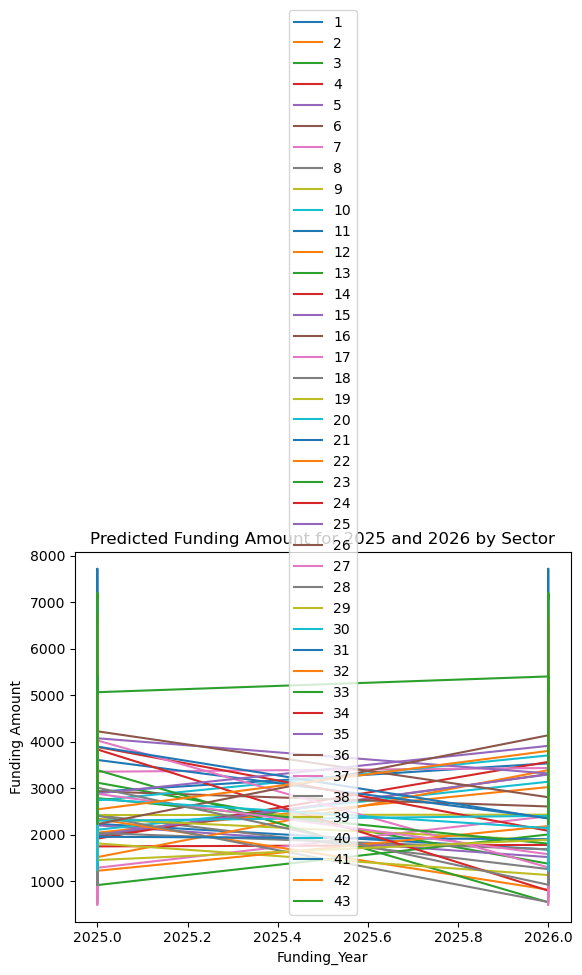

In [78]:
#predictions for each sector over time
for sector in future_data['Sector'].unique():
    sector_data = future_data[future_data['Sector'] == sector]
    plt.plot(sector_data['Funding_Year'], sector_data['Funding_Amount'], label=sector)

plt.xlabel('Funding_Year')
plt.ylabel('Funding Amount')
plt.title('Predicted Funding Amount for 2025 and 2026 by Sector')
plt.legend()
plt.show()

In [82]:
annual_funding = data.groupby(['Sector', 'Funding_Year'])['Funding_Amount'].sum().reset_index()
monthly_funding = data.groupby(['Sector', 'Month'])["Funding_Amount"].sum().reset_index()

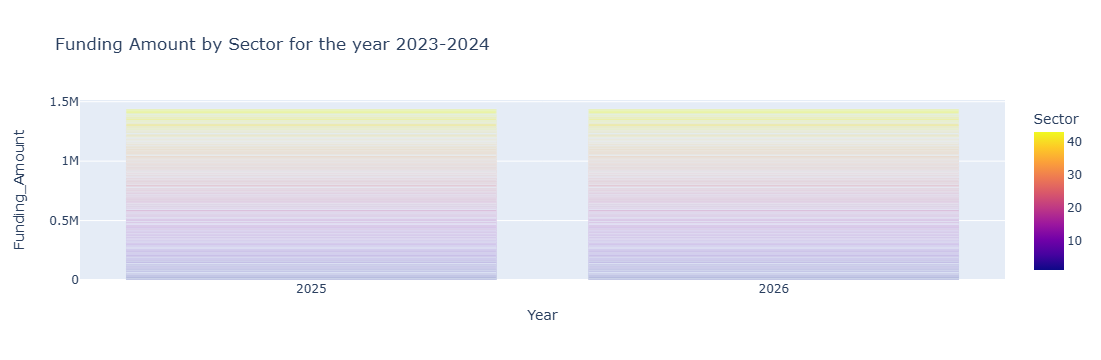

In [83]:
# Create a bar plot
fig = px.bar(
    data, 
    x="Funding_Year", 
    y="Funding_Amount", 
    color="Sector", 
    barmode="group",  # To group by sectors
    title="Funding Amount by Sector for the year 2023-2024",
    labels={
        "Funding_Amount": "Funding_Amount",
        "Funding_Year": "Year"
    }
)
fig

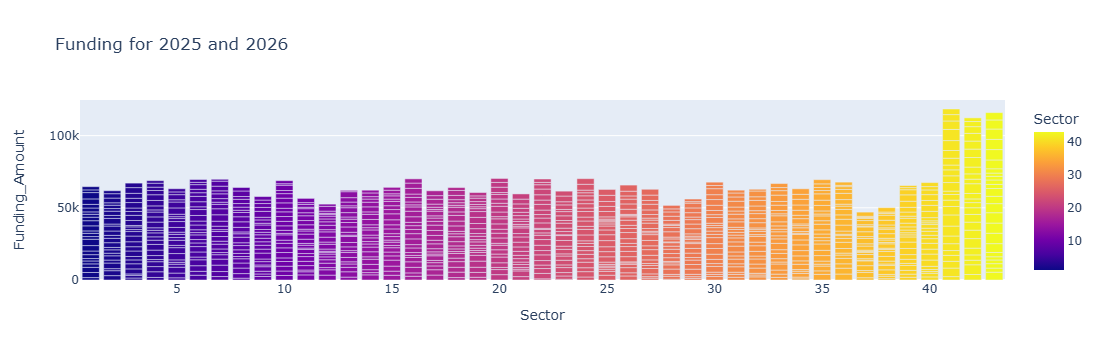

In [84]:
import plotly.express as px

fig=px.bar(data, x="Sector", y="Funding_Amount", title="Funding for 2025 and 2026", color="Sector")

fig.show()